![Mars Panorama](mars.jpg)

# RedRank

### A Terraforming Mars player rating system

#### Kevin Beam

_Experimental_

In [90]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

In [65]:
game_data = [
    {'Steve': 121, 'Benjamin': 110, 'Todd': 98},
    {'Steve': 82, 'Matt': 70, 'Allis': 64, 'Todd': 61, 'Benjamin': 59},
    {'Todd': 80, 'Matt': 78, 'Benjamin': 74, 'Steve': 71},
    {'Todd': 74, 'Matt': 71, 'Allis': 71, 'Benjamin': 62, 'Steve': 48},
    {'Allis': 96, 'Benjamin': 93, 'Steve': 87},
    {'Allis': 99, 'Benjamin': 92, 'Steve': 92},
    {'Steve': 159, 'Todd': 130},
    {'Benjamin': 70, 'Matt': 68, 'AllisTodd': 63, 'Steve': 57},
    {'Matt': 78, 'Todd': 64, 'Benjamin': 62, 'Steve': 60, 'Kevin': 48}
]

games = pd.DataFrame(game_data)
games

,Allis,AllisTodd,Benjamin,Kevin,Matt,Steve,Todd
0,NaN,NaN,110.0,NaN,NaN,121,98.0
1,64.0,NaN,59.0,NaN,70.0,82,61.0
2,NaN,NaN,74.0,NaN,78.0,71,80.0
3,71.0,NaN,62.0,NaN,71.0,48,74.0
4,96.0,NaN,93.0,NaN,NaN,87,NaN
5,99.0,NaN,92.0,NaN,NaN,92,NaN
6,NaN,NaN,NaN,NaN,NaN,159,130.0
7,NaN,63.0,70.0,NaN,68.0,57,NaN
8,NaN,NaN,62.0,48.0,78.0,60,64.0


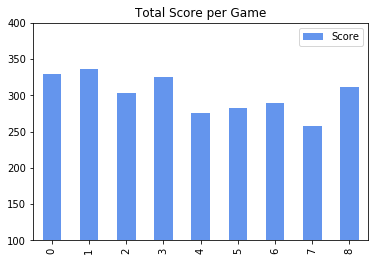

In [85]:
plt.figure()
pd.Series(games.sum(axis='columns'), name='Score')\
  .plot.bar(title='Total Score per Game', ylim=(100,400), color='cornflowerblue')
plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

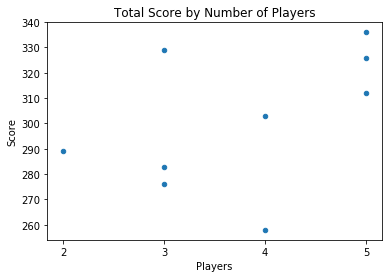

In [83]:
plt.figure()
pd.DataFrame({'Players': games.count(axis='columns').astype(np.uint8), 'Score': games.sum(axis='columns')})\
  .plot.scatter(x='Players', y='Score', title='Total Score by Number of Players', xticks=range(2, 6))

In [60]:
games.describe()

,Allis,AllisTodd,Benjamin,Kevin,Matt,Steve,Todd
count,4.000000,1.0,8.000000,1.0,5.000000,9.000000,6.000000
mean,82.500000,63.0,77.750000,48.0,73.000000,86.333333,84.500000
std,17.597348,NaN,18.506756,NaN,4.690416,34.985711,25.905598
min,64.000000,63.0,59.000000,48.0,68.000000,48.000000,61.000000
25%,69.250000,63.0,62.000000,48.0,70.000000,60.000000,66.500000
50%,83.500000,63.0,72.000000,48.0,71.000000,82.000000,77.000000
75%,96.750000,63.0,92.250000,48.0,78.000000,92.000000,93.500000
max,99.000000,63.0,110.000000,48.0,78.000000,159.000000,130.000000


In [86]:
norm_games = games.apply(lambda x: x / x.mean(), axis='columns')
norm_games.describe()

,Allis,AllisTodd,Benjamin,Kevin,Matt,Steve,Todd
count,4.000000,1.000000,8.000000,1.000000,5.000000,9.000000,6.000000
mean,1.033572,0.976744,0.984229,0.769231,1.092918,0.984844,0.986288
std,0.057765,NaN,0.058425,NaN,0.090564,0.141101,0.100790
min,0.952381,0.976744,0.877976,0.769231,1.029703,0.736196,0.893617
25%,1.020704,0.976744,0.969179,0.769231,1.041667,0.937294,0.901675
50%,1.046474,0.976744,0.985244,0.769231,1.054264,0.961538,0.966690
75%,1.059342,0.976744,1.004997,0.769231,1.088957,1.100346,1.048489
max,1.088957,0.976744,1.085271,0.769231,1.250000,1.220238,1.134969


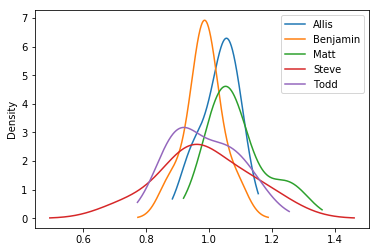

In [97]:
norm_games[['Allis', 'Benjamin', 'Matt', 'Steve', 'Todd']].plot.kde(title='Player Performance PDF Estimate')

In [101]:
rr = pd.DataFrame(columns = norm_games.columns)

ValueError: Shape of passed values is (1, 7), indices imply (7, 7)